**Task:**<br>
Predict the House prices (MEDV) based on given features
Please do all the EDA and Preprocessing you think can apply.

Write the observations below the cells you think to add.

Give all error scores.

**Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/Boston_Train - Boston_Train.csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [3]:
df.rename(columns={'medv':'Price'},inplace=True)
df.drop('Unnamed: 0',1,inplace=True)

In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
Price      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  Price    351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [ ]:
df.shape

(351, 14)

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


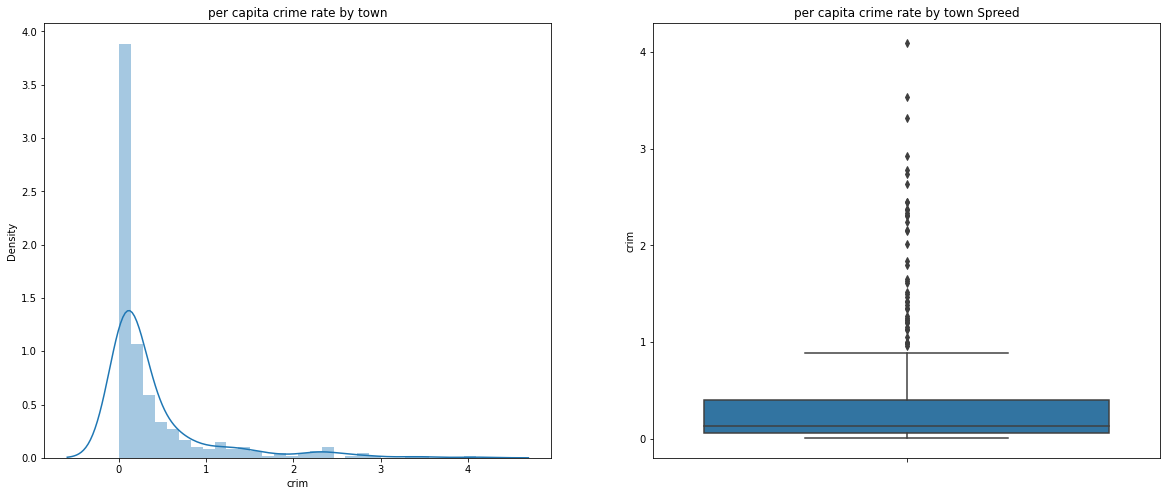

In [5]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('per capita crime rate by town')
sns.distplot(df.crim,bins=30)
plt.subplot(1,2,2)
plt.title('per capita crime rate by town Spreed')
sns.boxplot(y=df.crim)
plt.show()

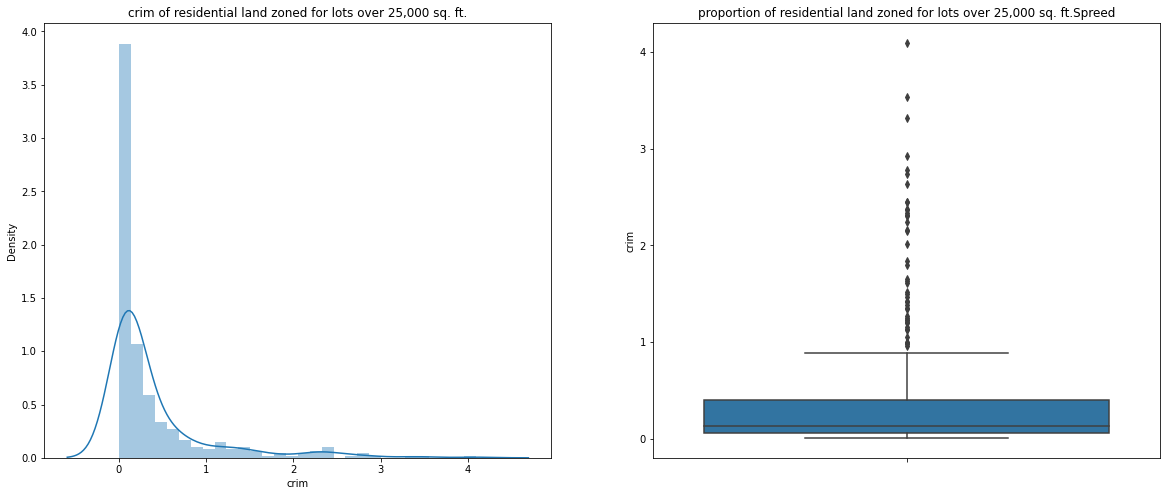

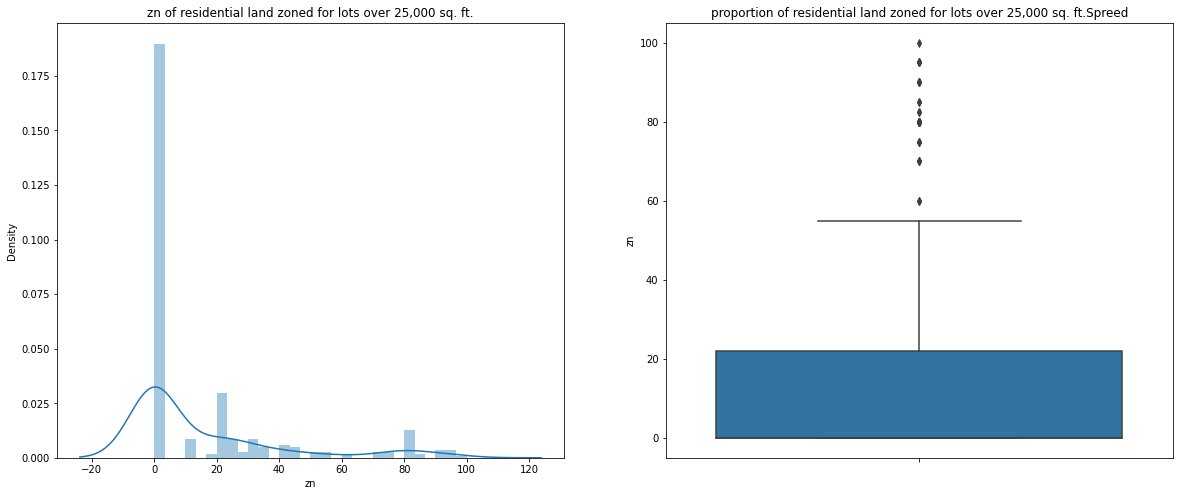

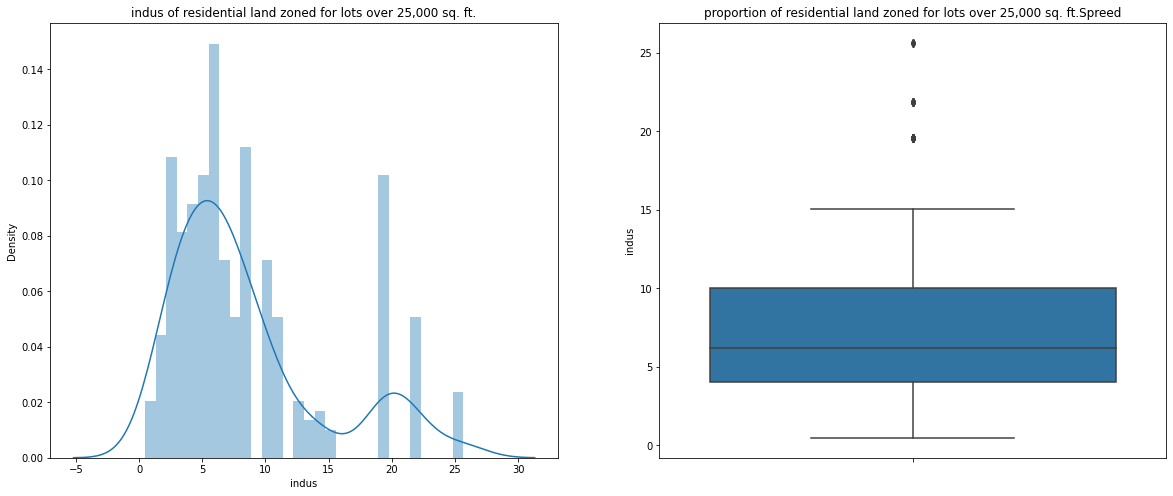

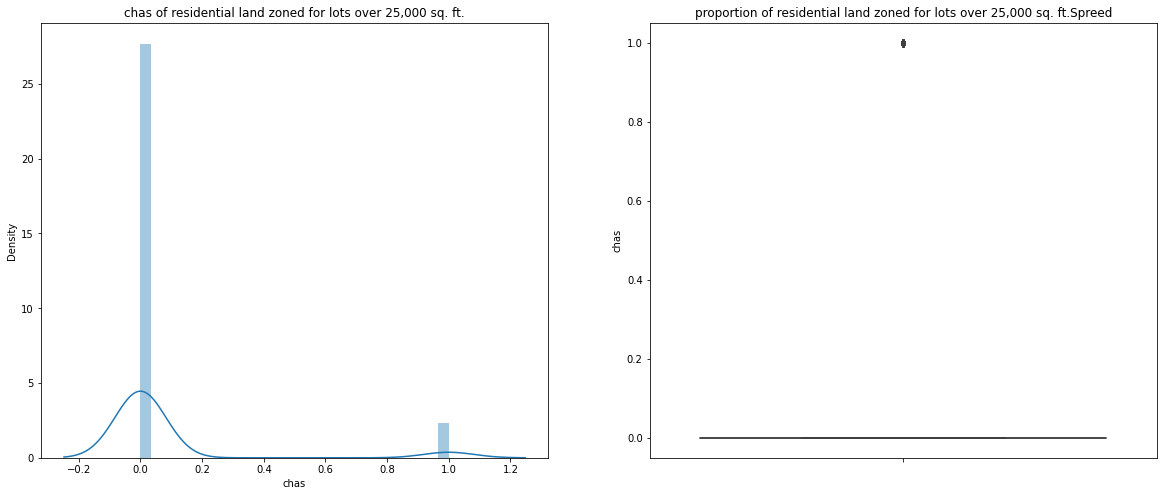

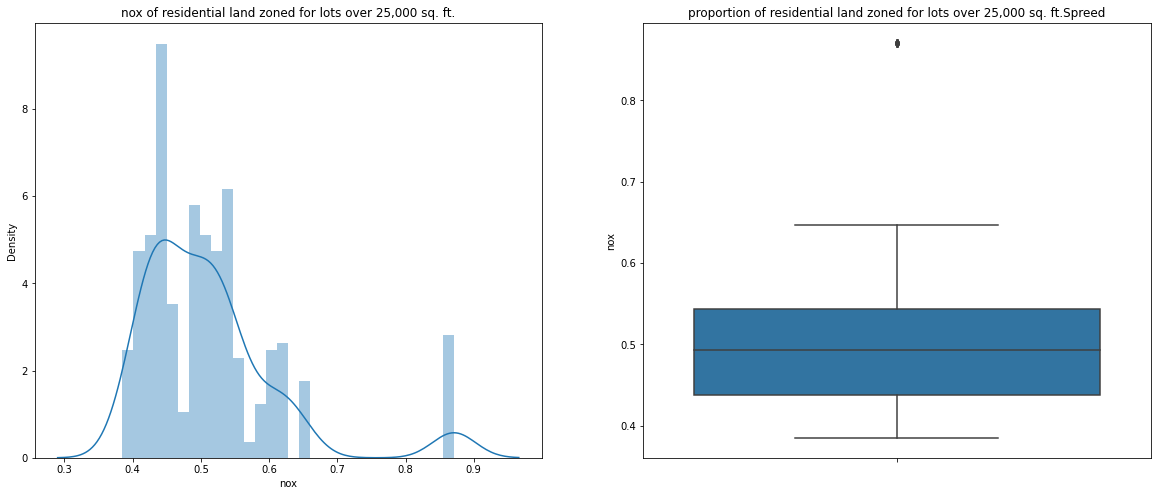

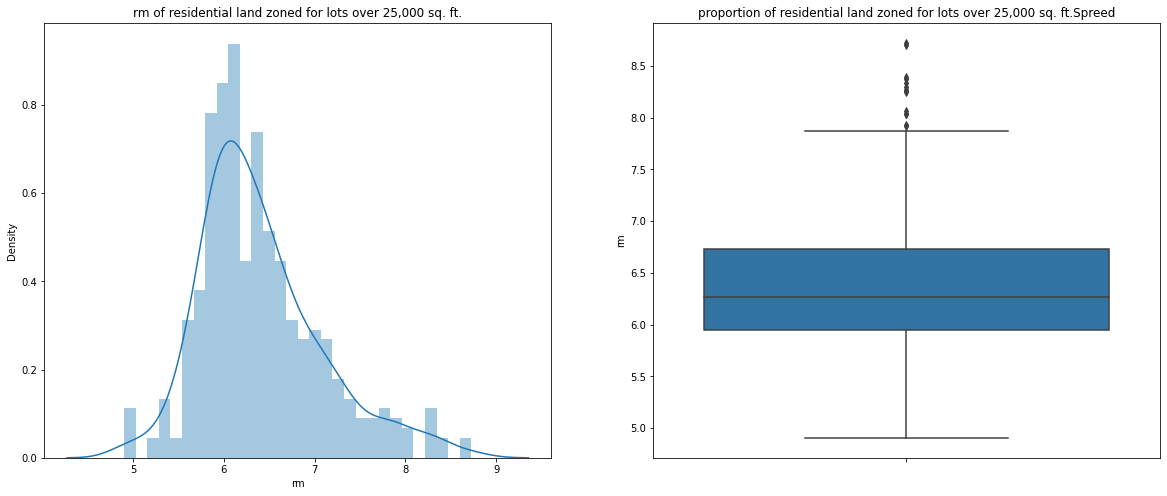

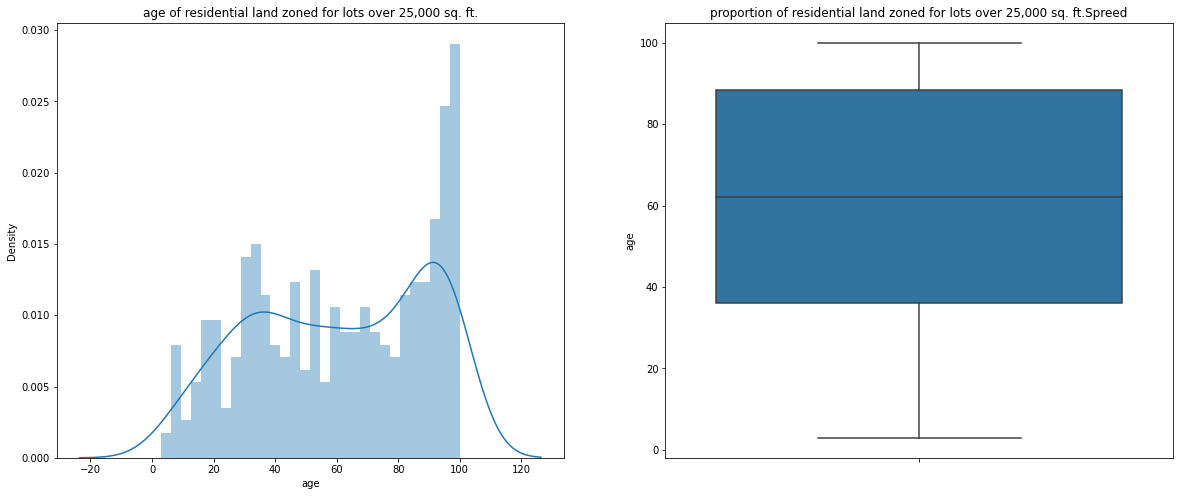

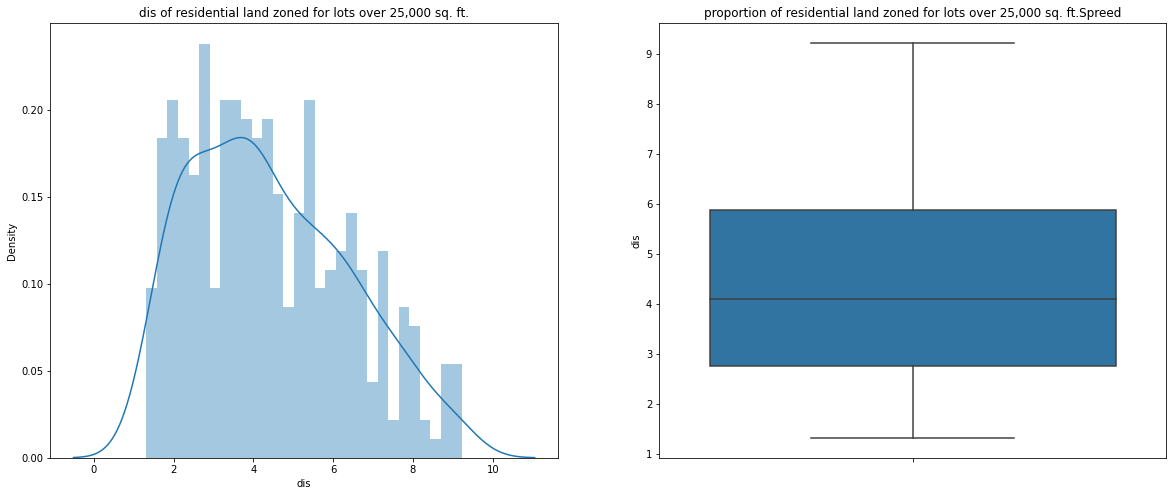

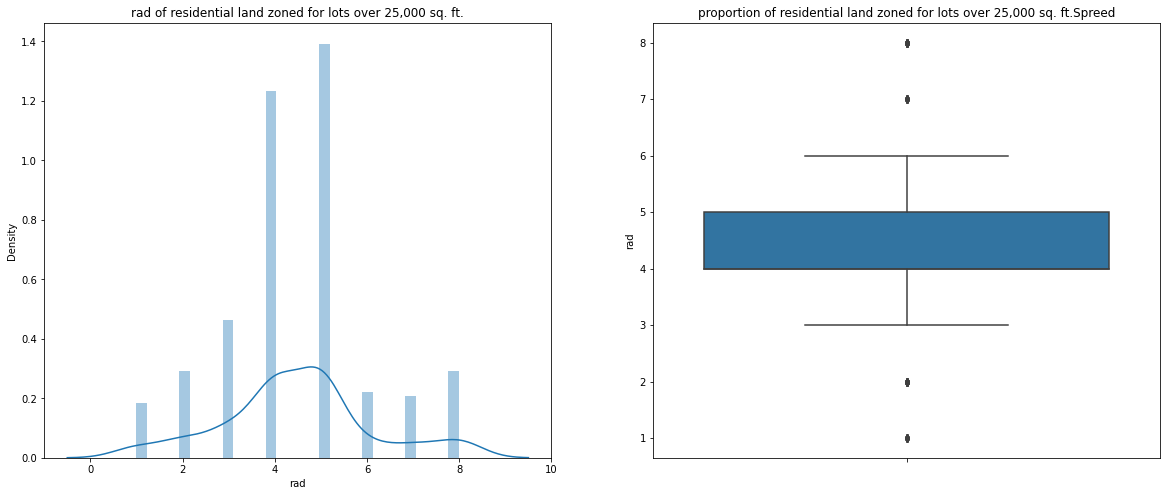

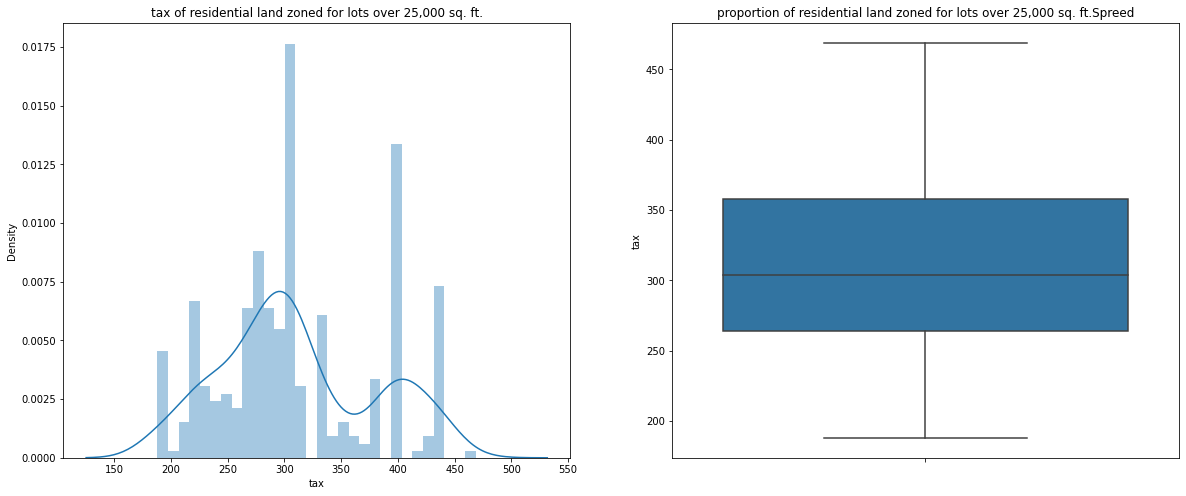

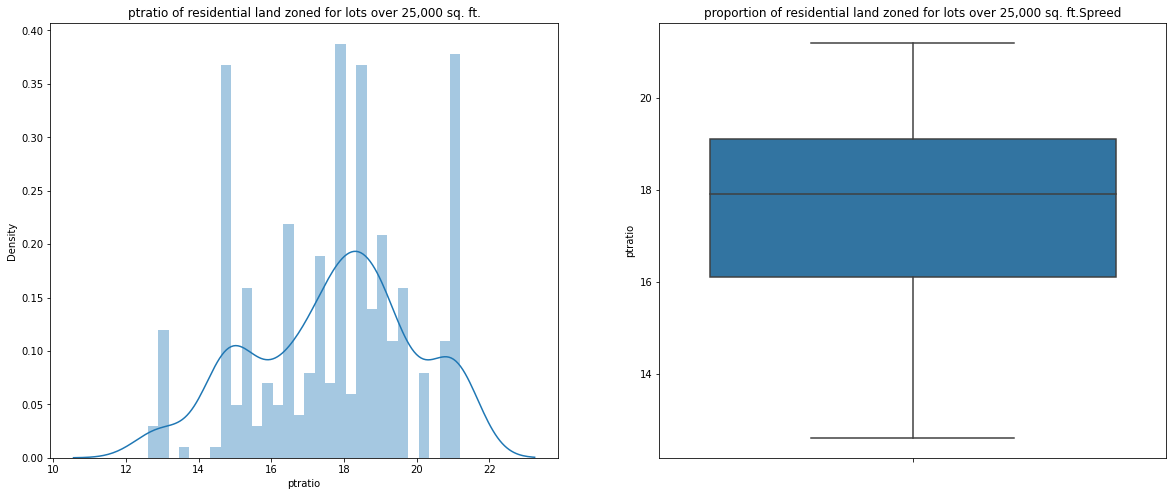

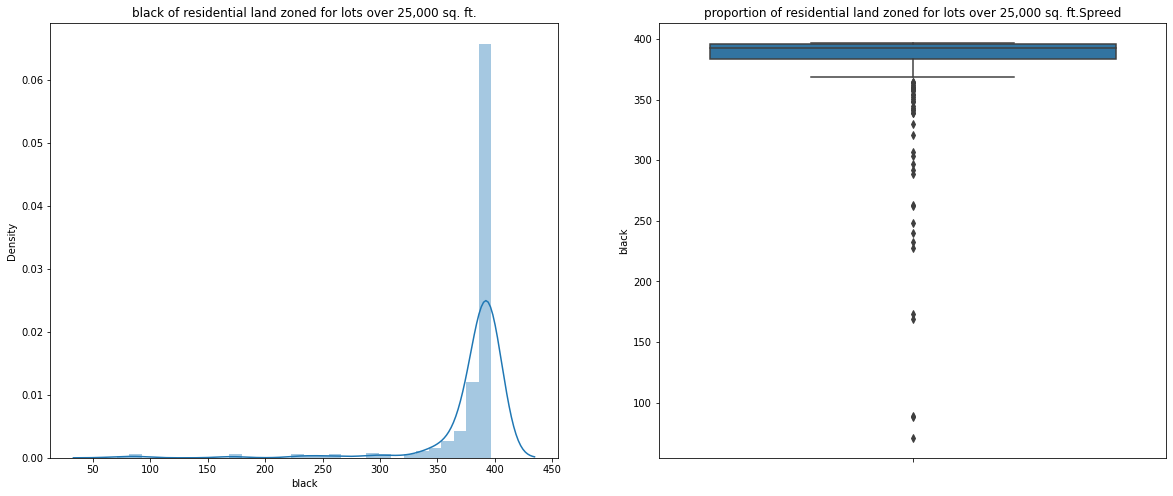

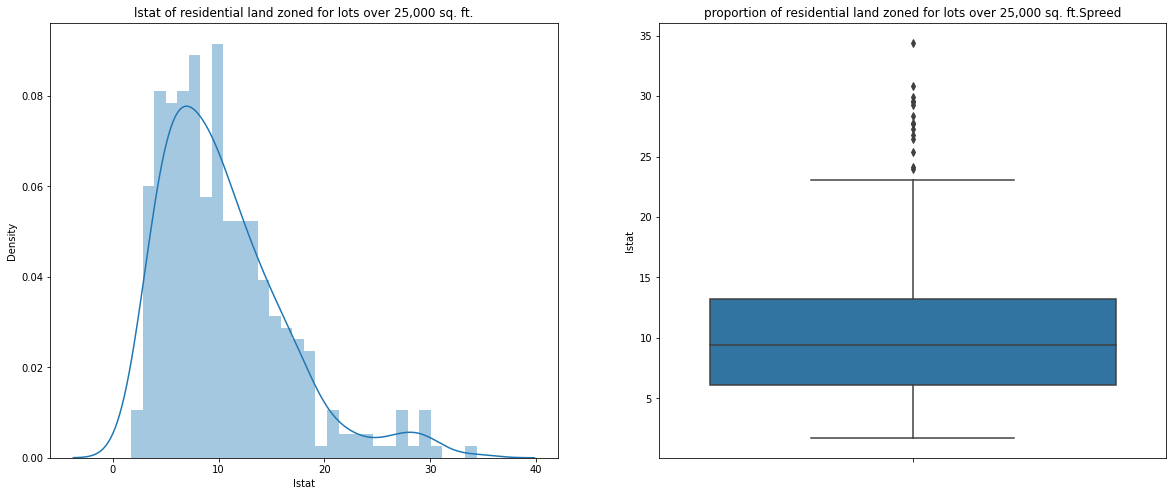

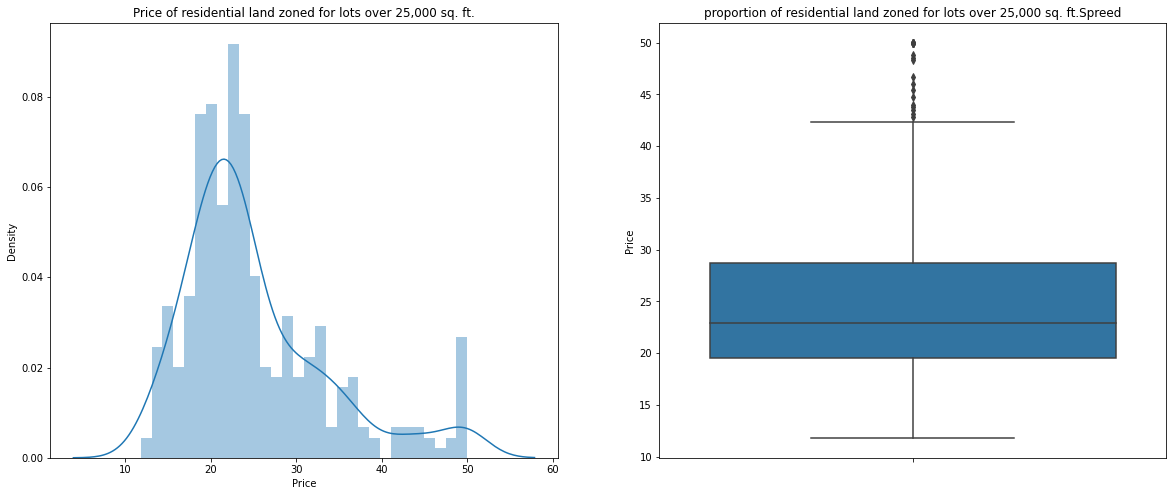

In [12]:
for i in df.columns:
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  plt.title(i+' of residential land zoned for lots over 25,000 sq. ft.')
  sns.distplot(df[i],bins=30)
  plt.subplot(1,2,2)
  plt.title('proportion of residential land zoned for lots over 25,000 sq. ft.Spreed')
  sns.boxplot(y=df[i])
  plt.show()

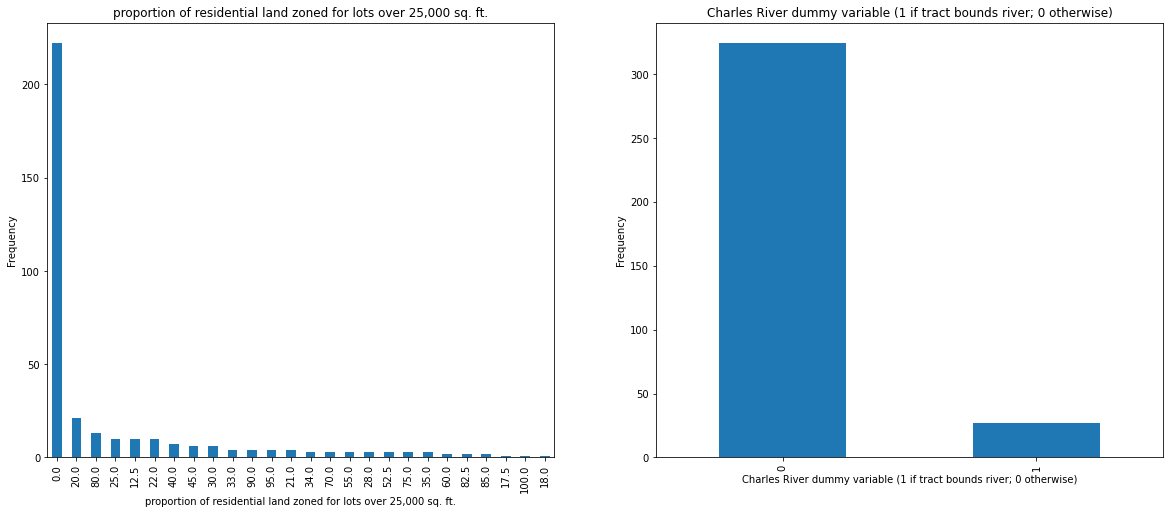

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt1 = df.zn.value_counts().plot(kind='bar')
plt.title('proportion of residential land zoned for lots over 25,000 sq. ft.')
plt1.set(xlabel='proportion of residential land zoned for lots over 25,000 sq. ft.',ylabel='Frequency')

plt.subplot(1,2,2)
plt2 = df.chas.value_counts().plot(kind='bar')
plt.title('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt2.set(xlabel='Charles River dummy variable (1 if tract bounds river; 0 otherwise)',ylabel='Frequency')
plt.show()

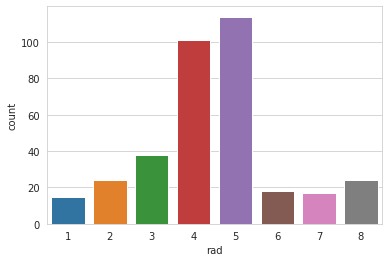

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='rad',data=df)
plt.show()

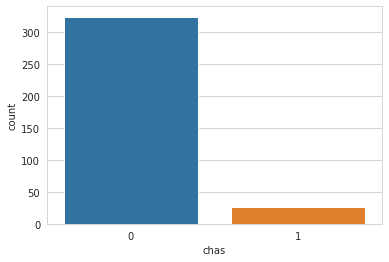

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='chas',data=df)
plt.show()

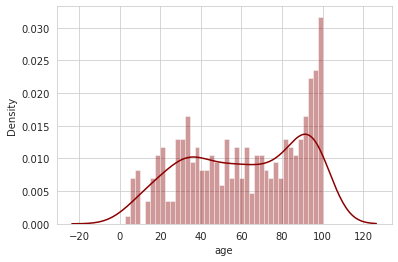

In [18]:
sns.distplot(df['age'].dropna(),kde=True,color='darkred',bins=40)
plt.show()

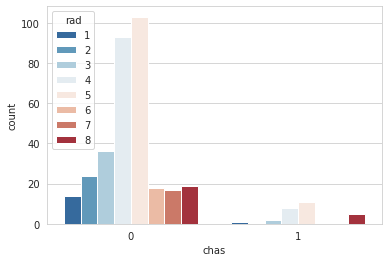

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='chas',hue='rad',data=df,palette='RdBu_r')
plt.show()

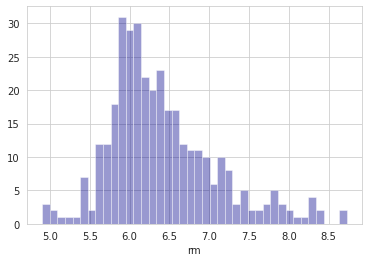

In [20]:
sns.distplot(df['rm'].dropna(),kde=False,color='darkblue',bins=40)
plt.show()

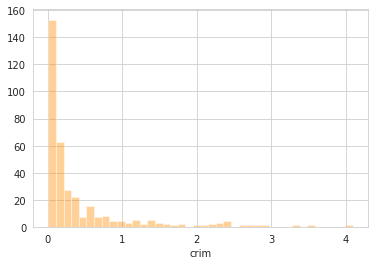

In [21]:
sns.distplot(df['crim'].dropna(),kde=False,color='darkorange',bins=40)
plt.show()

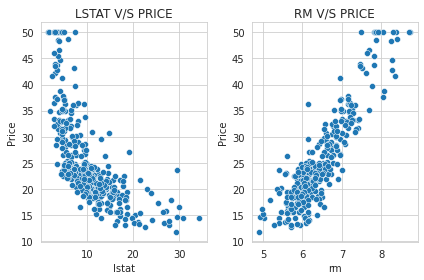

In [ ]:
plt.subplot(1,2,1)
plt.title('LSTAT V/S PRICE')
sns.scatterplot(x=df.lstat,y=df.Price)
plt.subplot(1,2,2)
plt.title('RM V/S PRICE')
sns.scatterplot(x=df.rm,y=df.Price)

plt.tight_layout()

In [ ]:
df_cor = df.corr()
df_cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
crim,1.000000,-0.298187,0.557235,0.129417,0.773321,-0.232369,0.487005,-0.490656,0.140519,0.406203,-0.222599,-0.522173,0.406877,-0.194024
zn,-0.298187,1.000000,-0.461280,-0.060150,-0.453540,0.327331,-0.516954,0.592013,-0.187620,-0.109459,-0.323917,0.141986,-0.384008,0.334885
indus,0.557235,-0.461280,1.000000,0.127674,0.669111,-0.384208,0.525184,-0.594800,0.018118,0.437328,0.101026,-0.311502,0.512586,-0.365981
chas,0.129417,-0.060150,0.127674,1.000000,0.131093,0.037826,0.129274,-0.153217,0.087686,-0.029835,-0.133981,-0.054426,0.062915,0.085798
nox,0.773321,-0.453540,0.669111,0.131093,1.000000,-0.262861,0.667044,-0.719072,0.138287,0.394700,-0.188388,-0.427552,0.488516,-0.247384
rm,-0.232369,0.327331,-0.384208,0.037826,-0.262861,1.000000,-0.179751,0.095919,0.094140,-0.204730,-0.328928,0.166340,-0.680006,0.894837
age,0.487005,-0.516954,0.525184,0.129274,0.667044,-0.179751,1.000000,-0.681234,0.126482,0.266733,0.049163,-0.229513,0.552882,-0.256284
dis,-0.490656,0.592013,-0.594800,-0.153217,-0.719072,0.095919,-0.681234,1.000000,-0.104500,-0.229837,0.023590,0.235331,-0.343134,0.047454
rad,0.140519,-0.187620,0.018118,0.087686,0.138287,0.094140,0.126482,-0.104500,1.000000,0.229822,-0.023634,-0.060212,-0.026626,0.066628
tax,0.406203,-0.109459,0.437328,-0.029835,0.394700,-0.204730,0.266733,-0.229837,0.229822,1.000000,-0.011439,-0.270342,0.240023,-0.286039


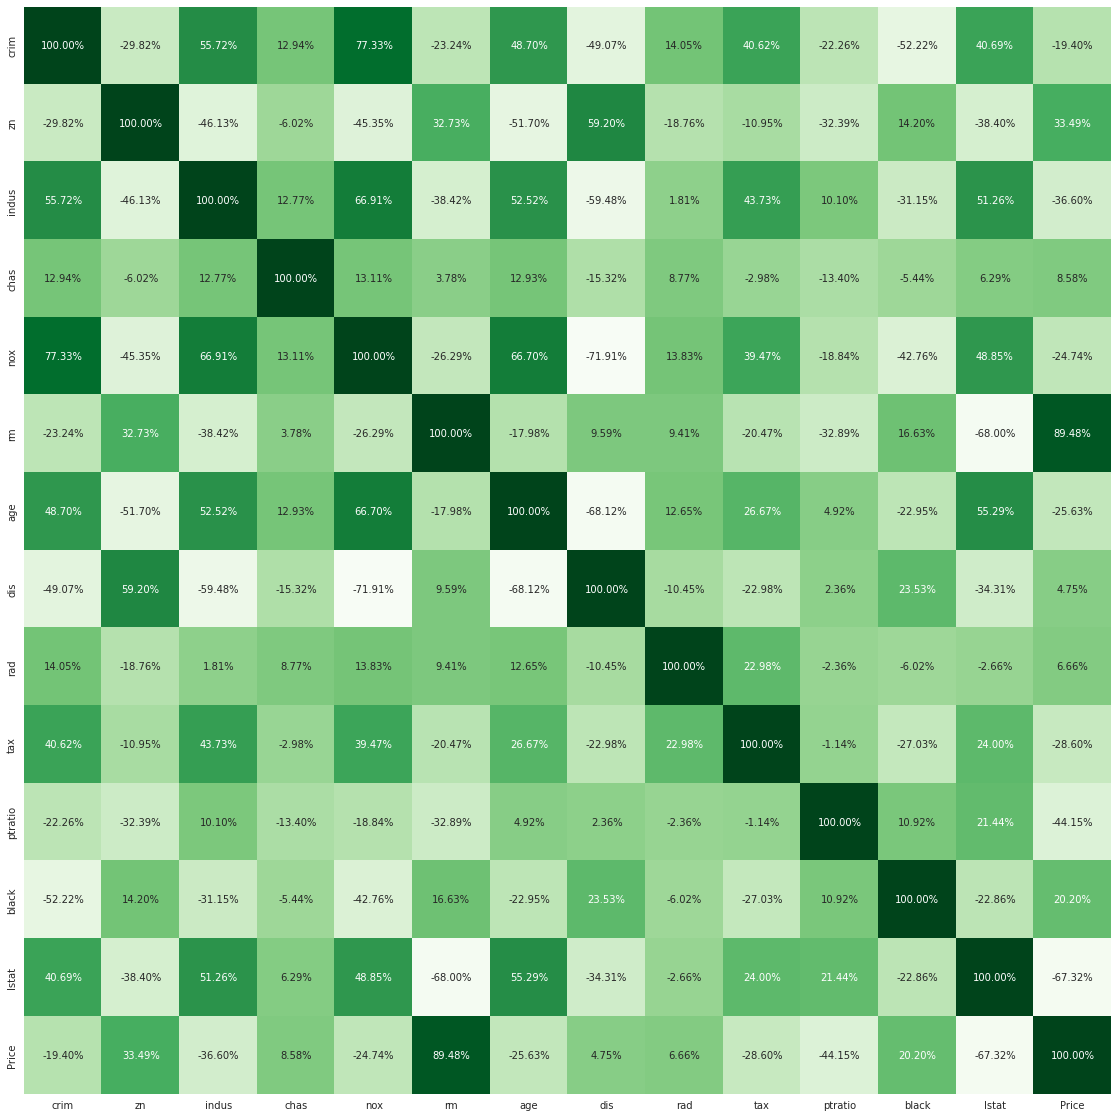

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cor, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

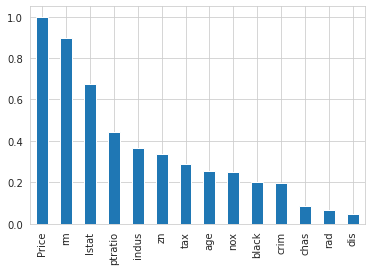

In [23]:
cor = df.corr().abs()
cor['Price'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Price')
plt.show()

In [50]:
df_test = pd.read_csv('/content/Boston_Test - Boston_Test.csv')

In [51]:
df_test.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [59]:
df_test.rename(columns={'medv':'Price'},inplace=True)
df_test.drop('Unnamed: 0',1,inplace=True)

In [ ]:
df_test.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
Price         0
dtype: int64

**Machine Learning**

**Feature Selecrion & Data Spliting**

In [32]:
X_train = df.drop(columns=['crim','zn','indus','chas','nox','age','dis','rad','tax','ptratio','black','Price'])
y_train = df.Price

In [60]:
X_test= df_test.drop(columns=['crim','zn','indus','chas','nox','age','dis','rad','tax','ptratio','black','Price'])
y_test = df_test.Price

**Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(351, 2)
(155, 3)
(351,)
(155,)


In [61]:
#Prediction of test set
y_pred = model.predict(X_test)
#Predicted values
y_pred

array([27.69386569, 20.22758975, 29.38046898, 17.93492508, 21.14032059,
       21.86731633, 24.47723743, 22.06101709, 21.70269582, 25.4552914 ,
       22.85359091, 14.50354116, 18.21934145, 50.11399485, -3.2829248 ,
        9.78667765, -1.28516158, 11.71491621, 29.05593086, 32.57588928,
       23.30337561, 19.94758316,  5.61562911, -2.74872074, 33.78447734,
       25.33667224, 27.15723126, 22.52296479, 21.256433  , 29.62374398,
       24.6524109 , 13.95451846, 13.62579567,  0.85967629, 10.07365147,
        4.15447049,  7.05235535,  6.06876578, 12.94510723, 16.87689955,
       20.02927098,  8.50955456, 22.09424365, 18.77799938, 24.58450479,
       23.52419792, 16.73682614, 11.90172162, 16.06700497, 17.9933487 ,
       22.72935544, 23.35149271, 12.71485345, 13.25006877, 15.55680412,
       -0.21906   , 16.67007137, 14.29419355, 27.9995749 , 18.53477107,
       25.76731371,  2.8573588 , 10.68815022,  1.29746773, 22.14538558,
       26.24844715, 11.06928949, 18.75162115, 27.20298632, 24.33

In [62]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
0,24.1,27.693866
1,18.6,20.227590
2,30.1,29.380469
3,18.2,17.934925
4,20.6,21.140321


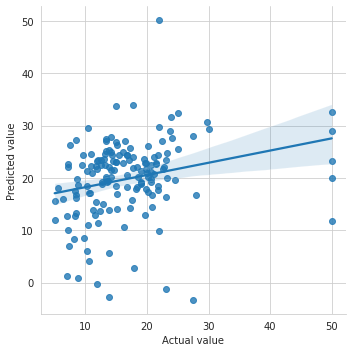

In [82]:
sns.lmplot(x='Actual value',y='Predicted value',data=a,markers='o')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.697559713827099
R2 score is 0.8085162978157654


The model performance for testing set
--------------------------------------
RMSE is 10.084583540235817
R2 score is -0.5272789981502009


**Logistic Regression**

In [67]:
from sklearn.tree import DecisionTreeRegressor
model01 = DecisionTreeRegressor(criterion='squared_error',splitter='random',max_depth=20,min_samples_split=15).fit(X_train,y_train)
model01

DecisionTreeRegressor(max_depth=20, min_samples_split=15, splitter='random')

In [75]:
from sklearn.metrics import accuracy_score,r2_score

In [79]:
y_pred01 = model01.predict(X_test)

In [83]:
b = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred01})
b.head()

,Actual value,Predicted value
0,24.1,26.088889
1,18.6,21.675000
2,30.1,22.800000
3,18.2,19.300000
4,20.6,23.100000


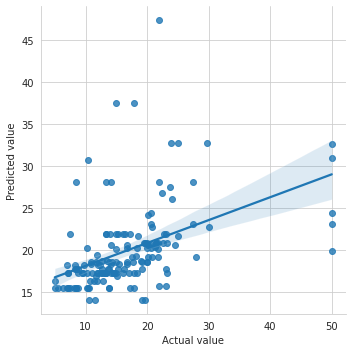

In [84]:
sns.lmplot(x='Actual value',y='Predicted value',data=b,markers='o')
plt.show()

In [85]:
# model evaluation for training set
y_train_predict = model01.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model01.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.8833974485516527
R2 score is 0.8835577891837939


The model performance for testing set
--------------------------------------
RMSE is 8.049363151335717
R2 score is 0.026971667293917423


In [92]:
import pickle
pickle.dump(model01,open('price_prediction','wb'))
modal = pickle.load(open('price_prediction','rb'))

In [93]:
modal.predict(X_train[0:50:2])

array([26.08888889, 35.37777778, 35.37777778, 20.67777778, 15.55454545,
       17.24545455, 18.70909091, 20.4125    , 23.1       , 19.9       ,
       14.1       , 17.24545455, 18.70909091, 20.25454545, 18.4       ,
       16.35      , 15.55454545, 17.24545455, 20.25454545, 20.33636364,
       32.6875    , 23.79285714, 24.475     , 20.25454545, 15.55454545])